In [46]:
#Importing the libraries
import pandas as pd               #for loading csv file data to  numpy array
import numpy as np                 #for using data as array
import matplotlib.pyplot as plt   #for plotting grph of x and y
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm  

In [3]:
#Loading dataset
    salary= pd.read_csv("C:/Users/rohan/Downloads/Salary_Data.csv")
salary   

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
#Exploratory Data Analysis in Python
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


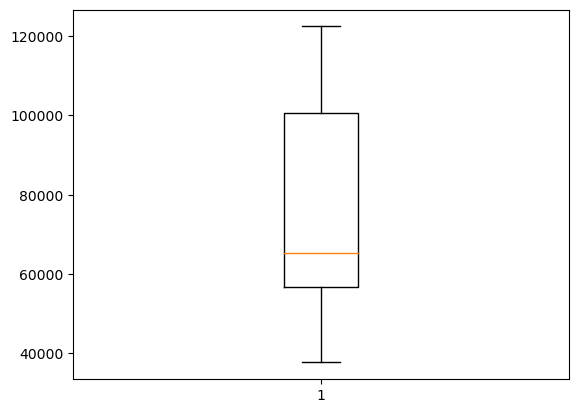

In [11]:
x=list(salary.Salary)
plt.boxplot(x)
plt.show()

In [18]:
# Perform ANOVA
import scipy as sp 
x=list(salary.YearsExperience)
y=list(salary.Salary)

f_statistic, p_value = sp.stats.f_oneway(x,y)
 
# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 230.54916915865942
p-value: 7.216326684306866e-22


slope b1 is 9449.962321455072
intercept b0 is 25792.200198668717


Text(0, 0.5, 'Dependent var y(Salary)')

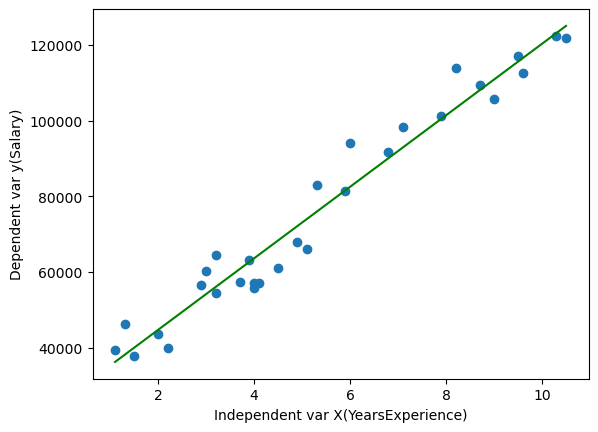

In [37]:
#Plot the given data points and fit the regression line.
xarray = np.array(salary.YearsExperience) 
yarray = np.array(salary.Salary)
n = np.size(x)

x_mean = np.mean(xarray)
y_mean = np.mean(yarray)
x_mean,y_mean
  
Sxy = np.sum(salary.YearsExperience*salary.Salary)- n*x_mean*y_mean
Sxx = np.sum(salary.YearsExperience*salary.YearsExperience)-n*x_mean*x_mean

b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('slope b1 is', b1)
print('intercept b0 is', b0)

y_pred = b1 * x + b0

plt.scatter(salary.YearsExperience,salary.Salary)
plt.plot(x, y_pred, color = 'green')
plt.xlabel('Independent var X(YearsExperience)')
plt.ylabel('Dependent var y(Salary)')

In [44]:
#Analyze the performance of the model by calculating mean squared error and R2

error = yarray - y_pred
se = np.sum(error**2)
print('squared error is', se)
   
mse = se/n 
print('mean squared error is', mse)
  
rmse = np.sqrt(mse)
print('root mean square error is', rmse)
  
SSt = np.sum((y - y_mean)**2)
R2 = 1- (se/SSt)
print('R square is', R2)

squared error is 938128551.6684287
mean squared error is 31270951.722280957
root mean square error is 5592.043608760661
R square is 0.9675064061484867


In [58]:
x = xarray.reshape(-1,1)
y = yarray.reshape(-1,1)

regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x,y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
  
# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)



Slope: [[9449.96232146]]
Intercept: [25792.20019867]
MSE: 31270951.722280957
Root mean squared error:  5592.043608760661
R2 score:  0.9569566641435086
